# Multivariate Logistic Regression
One-vs-All Logistic Regression, also known as One-vs-Rest Logistic Regression, is a technique used for multivariate logistic regression where there are more than two classes to be predicted. It extends the concept of logistic regression from binary classification to multiclass classification.

In multivariate logistic regression, the goal is to predict the probability of each class label based on a set of input features. However, logistic regression models are inherently designed for binary classification, where they estimate the probability of one class relative to the other.

The process of this will be as follows:
1. Implement logistic regression for 2 classes
2. Implement multivariate logistic regression by extending the logistic regression
3. Prepare the dataset
4. Train the model
5. Test the model
6. If possible, improve accuracy

In [48]:
from typing import List, Tuple
import numpy as np

Feature = float
FeatureVector = List[Feature]
Dataset = List[FeatureVector]

Label = int
Labels = List[Label]

LearningRate = float
Epoch = int

## Step 1: Logistic Regression

In [76]:
class LogisticRegression:
    def __init__(self, dataset: Dataset, labels: Labels, learning_rate: LearningRate, epochs: Epoch) -> None:
        self.dataset = dataset
        self.labels = labels
        self.learning_rate = learning_rate
        self.epochs = epochs

    def train(self) -> Tuple[List[float], float]:
        weights = np.random.random(len(self.dataset[0]))
        bias = np.random.random()

        for _ in range(self.epochs):
            index = np.random.randint(0, len(self.dataset) - 1)
            feature = self.dataset[index]
            label = self.labels[index]

            weights, bias = self._logistic_loss(weights, bias, feature, label)

        return weights, bias

    def predict(self, feature: FeatureVector, weights: List[float], bias: float) -> float:
        z = np.dot(weights, feature) + bias
        return self._sigmoid(z)

    def _logistic_loss(self, weights: List[float], bias: float, feature: FeatureVector, label: Label) -> Tuple[List[float], float]:
        predicted = self.predict(feature, weights, bias)
        error = predicted - label

        weights = [w - (self.learning_rate * error * f) for w, f in zip(weights, feature)]
        bias = bias - (self.learning_rate * error)

        return weights, bias

    def _sigmoid(self, z: float) -> float:
        return 1 / (1 + np.exp(-z))


## Step 2: Multivariate Logistic Regression

In [77]:
class MulticlassLogisticRegression:
    def __init__(self, dataset: Dataset, labels: Labels, learning_rate: LearningRate, epochs: Epoch) -> None:
        self.dataset = dataset
        self.labels = labels
        self.models = {}
        self.learning_rate = learning_rate
        self.epochs = epochs

        self._train()

    def _train(self) -> None:
        for label in self.labels:
            if label not in self.models:
                labels = [1 if x == label else 0 for x in self.labels]
                model = LogisticRegression(self.dataset, labels, self.learning_rate, self.epochs)
                slope, intercept = model.train()
                self.models[label] = (model, slope, intercept)

    def predict(self, feature_vector: FeatureVector) -> int:
        best_score = 0
        best_label = None

        for label, (model, slope, intercept) in self.models.items():
            score = model.predict(feature_vector, slope, intercept)

            if score > best_score:
                best_score = score
                best_label = label
        
        return best_label


## Step 3: Prepare the dataset

In [8]:
# Importing the libraries
from mnist import MNIST

mndata = MNIST('../datasets')
mndata.gz = True
training_images, training_labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [73]:
training_images, training_labels = np.array(training_images[:1000]), np.array(training_labels[:1000])


## Step 4 & 5: Train the model and test it using different hyperparameters

In [80]:
def accuracy(model, images, labels):
    correct = 0
    for image, label in zip(images, labels):
        predicted = model.predict(image)
        if predicted == label:
            correct += 1
    return correct / len(images)

In [82]:
test_images, test_labels = np.array(test_images), np.array(test_labels)
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0, 1.5]
accuracies = []

for learning_rate in learning_rates:
    model = MulticlassLogisticRegression(training_images, training_labels, learning_rate, 1000)
    accuracies.append(accuracy(model, test_images, test_labels))

/tmp/ipykernel_37669/2698951480.py:35: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


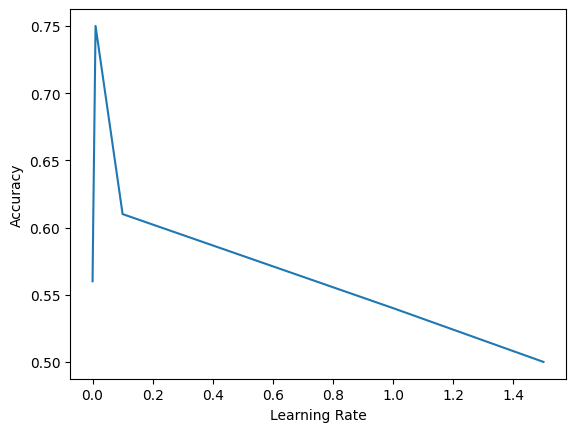

[0.56, 0.58, 0.75, 0.61, 0.54, 0.5]


In [83]:
import matplotlib.pyplot as plt

plt.plot(learning_rates, accuracies)
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.show()

print(accuracies)


In [68]:
print(accuracies)

[]
